In [1]:
import numpy as np
import pandas as pd

In [5]:
train_path = "fashion-mnist_train.csv.csv"
test_path = "fashion-mnist_test.csv.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(train_df.shape)
print(test_df.shape)

(60000, 785)
(10000, 785)


In [6]:
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [9]:
from collections import Counter

def knn_predict(X_train, y_train, x_test, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])

    k_nearest_labels = [label for (_, label) in distances[:k]]

    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

In [10]:
X_train_small = X_train[:2000]
y_train_small = y_train[:2000]

X_test_small = X_test[:100]
y_test_small = y_test[:100]

In [11]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [12]:
k = 3
predictions = []

for i in range(len(X_test_small)):
    pred = knn_predict(X_train_small, y_train_small, X_test_small[i], k)
    predictions.append(pred)

predictions = np.array(predictions)

acc = accuracy(y_test_small, predictions)
print("Accuracy for k =", k, ":", acc)

Accuracy for k = 3 : 0.9


In [13]:
k_values = [1, 3, 5, 7]
accuracies = []

for k in k_values:
    preds = []
    for i in range(len(X_test_small)):
        pred = knn_predict(X_train_small, y_train_small, X_test_small[i], k)
        preds.append(pred)

    preds = np.array(preds)
    acc = accuracy(y_test_small, preds)
    accuracies.append(acc)
    print(f"k = {k}, accuracy = {acc}")

k = 1, accuracy = 0.86
k = 3, accuracy = 0.9
k = 5, accuracy = 0.91
k = 7, accuracy = 0.89


In [14]:
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)

print("Best k value:", best_k)
print("Best accuracy:", best_acc)

Best k value: 5
Best accuracy: 0.91


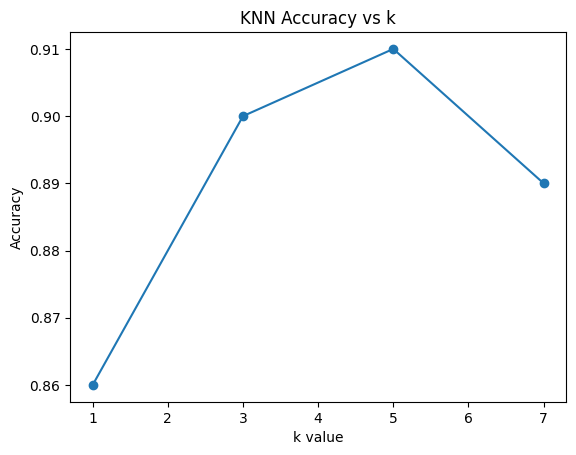

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.show()